<a href="https://colab.research.google.com/github/Kashishsingla111/TEXT_SUMMARIZATION/blob/main/PTM_TOPSIS50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assignment 2 (102117210)

In [1]:
pip install rouge

In [2]:
pip install tabulate

In [4]:
#models used from Hugging Face for Text Summarization
model_names = [
    "facebook/bart-large-cnn",
    "google/pegasus-large",
    "t5-large",
    "sshleifer/distilbart-cnn-12-6",
    "microsoft/prophetnet-large-uncased"
]

In [5]:
#Evaluation Parameters used: ROGUE AND BLEU
#ROGUE: Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics and a software package used for evaluating automatic summarization and machine translation software in natural language processing.
#BLEU: BiLingual Evaluation Understudy, is a metric for automatically evaluating machine-translated text. The BLEU score is a number between zero and one that measures the similarity of the machine-translated text to a set of high quality reference translations.
evaluation_parameters = [
    "ROUGE-1", #unigram
    "ROUGE-2", #bigram
    "ROUGE-L", #longest common subsequence
    "BLEU"
]

In [6]:
result_df = pd.DataFrame(columns=["Model", *evaluation_parameters])

In [7]:
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []
bleu_scores = []

In [8]:
tokenizer = AutoTokenizer.from_pretrained("t5-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [3]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [9]:
input_text = "The field of natural language processing has witnessed significant advancements in recent years, leading to breakthroughs in various applications and industries. From machine translation to sentiment analysis, the impact of NLP is profound."

In [10]:
reference_summary = "Natural language processing (NLP) has seen advancements, impacting machine translation and sentiment analysis."


In [11]:
for model_name in model_names:
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    summarization_pipeline = pipeline("summarization", model=model, tokenizer=tokenizer)

    generated_summary = summarization_pipeline(input_text, max_length=150, min_length=40, do_sample=False)[0]['summary_text']

    # Calculate ROUGE scores
    rouge = Rouge()
    rouge_scores_model = rouge.get_scores(generated_summary, reference_summary)[0]
    rouge_1 = rouge_scores_model['rouge-1']['f']
    rouge_2 = rouge_scores_model['rouge-2']['f']
    rouge_l = rouge_scores_model['rouge-l']['f']

    # Calculate BLEU score
    bleu = sentence_bleu([reference_summary.split()], generated_summary.split())

    rouge_1_scores.append(rouge_1)
    rouge_2_scores.append(rouge_2)
    rouge_l_scores.append(rouge_l)
    bleu_scores.append(bleu)

    result_df = result_df.append({
        "Model": model_name,
        "ROUGE-1": rouge_1,
        "ROUGE-2": rouge_2,
        "ROUGE-L": rouge_l,
        "BLEU": bleu
    }, ignore_index=True)




config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
<ipython-input-11-92da5760da6b>:22: FutureWarning: The frame.append method is dep

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWar

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
<ipython-input-11-92da5760da6b>:22: FutureWarning: The frame.append method is dep

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
<ipython-input-11-92da5760da6b>:22: FutureWarning: The frame.append method is dep

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:381: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
<ipython-input-11-92da5760da6b>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


In [12]:
result_df.to_csv("textsres.csv", index=False)

In [13]:
#Normalise
rouge_1_scores = np.array(rouge_1_scores)
rouge_2_scores = np.array(rouge_2_scores)
rouge_l_scores = np.array(rouge_l_scores)
bleu_scores = np.array(bleu_scores)

In [14]:
scores_matrix = np.array([rouge_1_scores, rouge_2_scores, rouge_l_scores, bleu_scores]).T

In [15]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [16]:
def topsis_score(matrix, weights):
    normalized_matrix = matrix / np.linalg.norm(matrix, axis=0)
    weighted_matrix = normalized_matrix * weights
    positive_ideal_solution = np.max(weighted_matrix, axis=0)
    negative_ideal_solution = np.min(weighted_matrix, axis=0)
    distance_positive_ideal = np.linalg.norm(weighted_matrix - positive_ideal_solution, axis=1)
    distance_negative_ideal = np.linalg.norm(weighted_matrix - negative_ideal_solution, axis=1)
    topsis_score = distance_negative_ideal / (distance_negative_ideal + distance_positive_ideal)
    return topsis_score

In [17]:
topsis_scores = topsis_score(scores_matrix, weights)

In [18]:
print("Length of model_names:", len(model_names))
print("Length of rouge_1_scores:", len(rouge_1_scores))
print("Length of rouge_2_scores:", len(rouge_2_scores))
print("Length of rouge_l_scores:", len(rouge_l_scores))
print("Length of bleu_scores:", len(bleu_scores))
print("Length of topsis_scores:", len(topsis_scores))

Length of model_names: 5
Length of rouge_1_scores: 5
Length of rouge_2_scores: 5
Length of rouge_l_scores: 5
Length of bleu_scores: 5
Length of topsis_scores: 5


In [19]:
results_df = pd.DataFrame({
    "Model": model_names,
    "ROUGE-1": rouge_1_scores*100,
    "ROUGE-2": rouge_2_scores*100,
    "ROUGE-L": rouge_l_scores*100,
    "BLEU": bleu_scores*100,
    "TOPSIS Score": topsis_scores*100
})

In [20]:
results_df["Rank"] = results_df["TOPSIS Score"].rank(ascending=False, method='min').astype(int)

In [21]:
results_df.to_csv("resultsTS.csv", index=False)

In [22]:
#Before TOPSIS
print("Intermediate Evaluation Results:")
print(tabulate(result_df, headers='keys', tablefmt='pretty'))

Intermediate Evaluation Results:
+---+------------------------------------+---------------------+----------------------+---------------------+------------------------+
|   |               Model                |       ROUGE-1       |       ROUGE-2        |       ROUGE-L       |          BLEU          |
+---+------------------------------------+---------------------+----------------------+---------------------+------------------------+
| 0 |      facebook/bart-large-cnn       | 0.3111111070024692  | 0.07272726931570264  | 0.3111111070024692  | 4.231460607757819e-155 |
| 1 |        google/pegasus-large        | 0.11111110709876558 |         0.0          | 0.11111110709876558 | 6.190746313491463e-232 |
| 2 |              t5-large              | 0.3255813911303408  | 0.08695651788279792  | 0.3255813911303408  | 4.712028347038631e-155 |
| 3 |   sshleifer/distilbart-cnn-12-6    | 0.21052631128808874 | 0.049999995800000356 | 0.21052631128808874 | 3.884252021064659e-155 |
| 4 | microsoft/prophe

In [23]:
#After TOPSIS
print("\nFinal Results with TOPSIS:")
print(tabulate(results_df, headers='keys', tablefmt='pretty'))


Final Results with TOPSIS:
+---+------------------------------------+--------------------+-------------------+--------------------+-------------------------+--------------------+------+
|   |               Model                |      ROUGE-1       |      ROUGE-2      |      ROUGE-L       |          BLEU           |    TOPSIS Score    | Rank |
+---+------------------------------------+--------------------+-------------------+--------------------+-------------------------+--------------------+------+
| 0 |      facebook/bart-large-cnn       | 31.11111070024692  | 7.272726931570264 | 31.11111070024692  | 4.231460607757819e-153  |  89.6186986230545  |  2   |
| 1 |        google/pegasus-large        | 11.111110709876558 |        0.0        | 11.111110709876558 | 6.190746313491463e-230  | 21.629171084668883 |  4   |
| 2 |              t5-large              | 32.55813911303408  | 8.695651788279791 | 32.55813911303408  | 4.7120283470386307e-153 |       100.0        |  1   |
| 3 |   sshleifer/

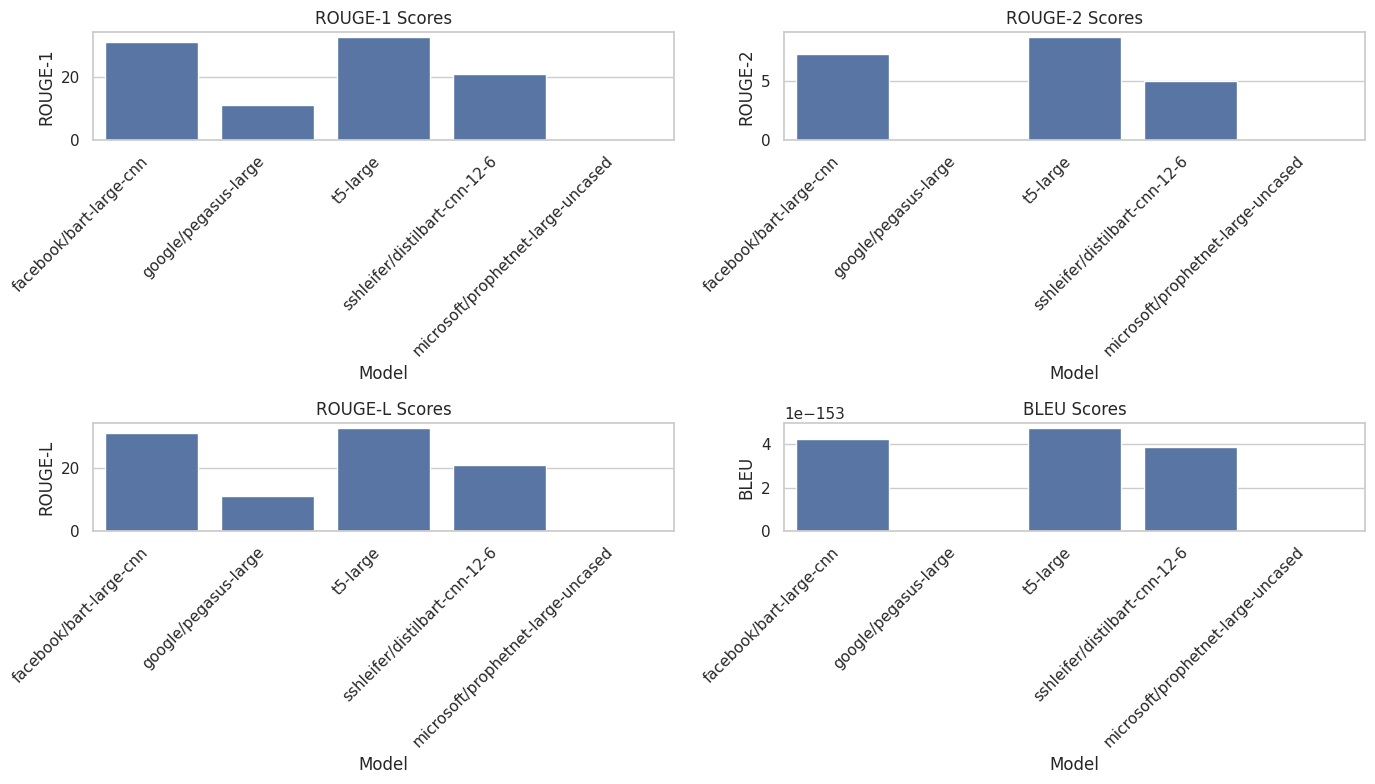

In [24]:
# Visualisation of scores
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))


# Plot ROUGE scores
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="ROUGE-1", data=results_df)
plt.title("ROUGE-1 Scores")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="ROUGE-2", data=results_df)
plt.title("ROUGE-2 Scores")
plt.xticks(rotation=45, ha="right")

plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="ROUGE-L", data=results_df)
plt.title("ROUGE-L Scores")
plt.xticks(rotation=45, ha="right")

plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="BLEU", data=results_df)
plt.title("BLEU Scores")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.savefig("text_summarization.png")
plt.show()
